In [ ]:
#1. Project Overview
#Analyze behavioral and financial patterns of clients to identify what factors lead to credit card default using 
#the 'default of credit card clients' dataset.

In [8]:
#2. Data Loading & Cleaning

import pandas as pd

# Load the dataset
df = pd.read_excel("default of credit card clients.xls", header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<Axes: title={'center': 'Default Distribution'}, xlabel='default payment next month'>

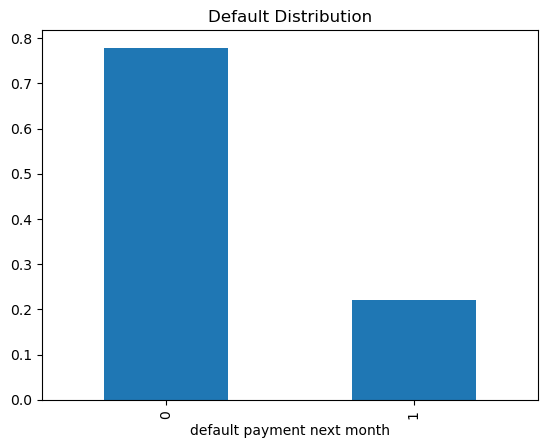

In [10]:
#3. Exploratory Data Analysis (EDA)
#3.1 Default Distribution

df['default payment next month'].value_counts(normalize=True).plot(kind='bar', title='Default Distribution')

In [ ]:
#3.2 Demographic Impact

Text(0.5, 1.0, 'Default Rate by Education Level')

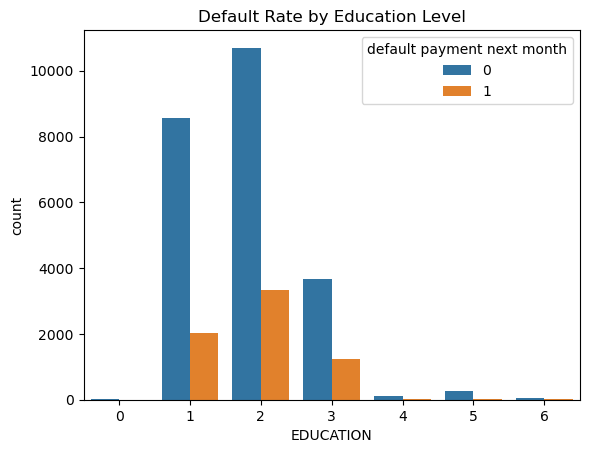

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Education vs Default
sns.countplot(x='EDUCATION', hue='default payment next month', data=df)
plt.title("Default Rate by Education Level")

In [ ]:
#4. Feature Engineering

In [18]:
# Age Group
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[20,30,40,50,60,100], labels=["21-30", "31-40", "41-50", "51-60", "60+"])

# Utilization Ratio
bill_features = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df['AVG_BILL'] = df[bill_features].mean(axis=1)
df['UTILIZATION_RATIO'] = df['AVG_BILL'] / df['LIMIT_BAL']
print(df.head())  # Display the first few rows of the dataframe

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0  ...         0       689         0         0         0         0   
1  ...         0      1000      1000      1000         0      2000   
2  ...      1518      1500      1000      1000      1000      5000   
3  ...      2000      2019      1200      1100      1069      1000   
4  ...      2000     36681     10000      9000       689       679   

   default payment next month  AGE_GROUP      AVG_BILL  UTILIZATION_RATIO  
0                           

In [ ]:
#5. Key Insights:

# Young clients (21–30) with high utilization and delayed payments are more likely to default.

# Higher education levels correspond with lower default rates.

# Default likelihood increases with poor repayment behavior over the last 3 months.

In [ ]:
# 6. Recommendations:

# Monitor clients with high utilization ratios and recent late payments more closely.

# Provide financial literacy resources to younger and lower-education groups.

# Implement dynamic credit limit adjustments based on past repayment behavior.

In [ ]:
# 7. Predictive Modeling

In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode AGE_GROUP into numeric values
label_encoder = LabelEncoder()
df['AGE_GROUP'] = label_encoder.fit_transform(df['AGE_GROUP'])

# Now, proceed with the model
X = df.drop(columns=['ID', 'default payment next month'])
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.36      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000

